In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

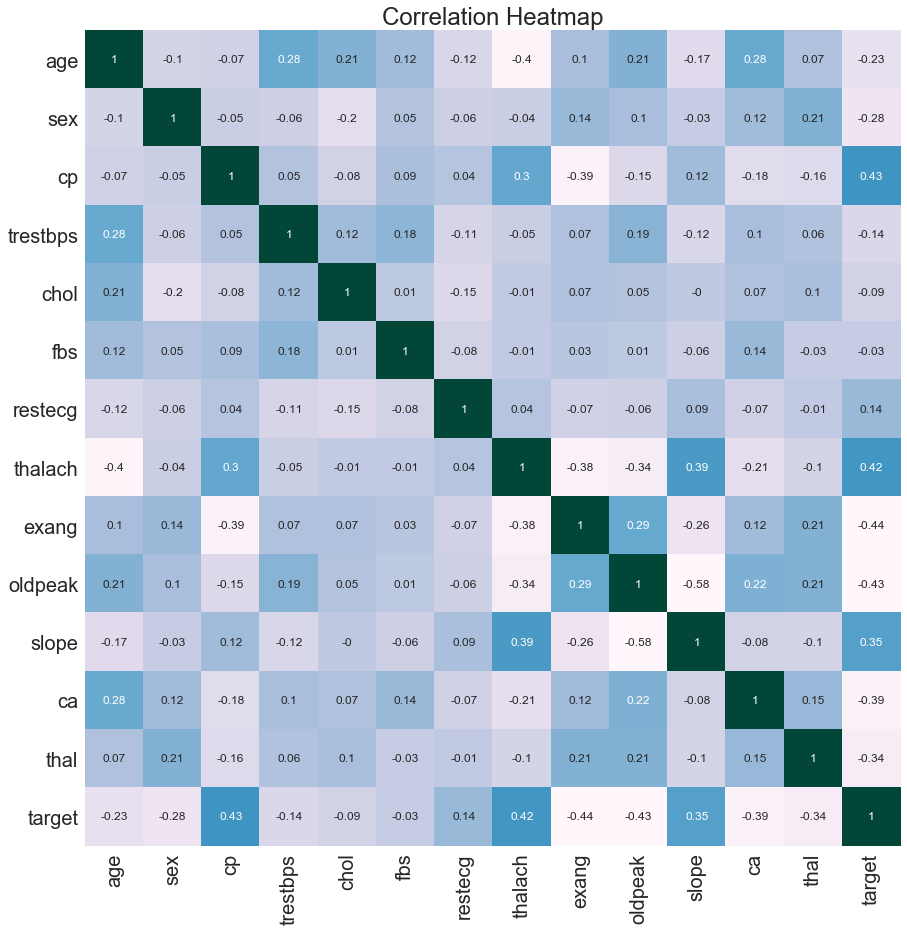

In [31]:
plt.figure(figsize=(15,15))
sns.set(font_scale=2)
corr_df = df.astype(float).corr()
for col in corr_df:
    corr_df[col] = corr_df[col].apply(lambda x: round(x,2))
sns.heatmap(corr_df,robust=True,\
            annot=True,cbar=False,square=True,cmap='PuBuGn',annot_kws={'size':12})
plt.title('Correlation Heatmap')
plt.savefig('heatmap.jpg')
plt.show()

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
for col in df.columns:
    print(col, df[col].isnull().sum())

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0


In [20]:
import pandas_profiling as pp
pp.ProfileReport(df)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [41]:
for k,v in desc.items():
    print(k)

table
variables
freq
correlations


In [48]:
desc['variables'].columns

Index(['count', 'distinct_count', 'is_unique', 'memorysize', 'mode',
       'n_infinite', 'n_missing', 'p_infinite', 'p_missing', 'p_unique', 'top',
       'freq', 'type', 'mean', '25%', '5%', '50%', '75%', '95%', 'cv',
       'histogram', 'iqr', 'kurtosis', 'mad', 'max', 'min', 'mini_histogram',
       'n_zeros', 'p_zeros', 'range', 'skewness', 'std', 'sum', 'variance'],
      dtype='object')

In [17]:
feature_summary = desc['variables'][['count','distinct_count','mean','skewness','kurtosis','std']].astype({
    'count':int,'distinct_count':int,'mean':float,'skewness':float,'kurtosis':float,'std':float})
for col in feature_summary.select_dtypes('float').columns:
    feature_summary[col] = feature_summary[col].apply(lambda x: '%4.2f' % x)

In [18]:
feature_summary

,count,distinct_count,mean,skewness,kurtosis,std
age,303,41,54.37,-0.20,-0.54,9.08
ca,303,5,0.73,1.31,0.84,1.02
chol,303,152,246.26,1.14,4.51,51.83
cp,303,4,0.97,0.48,-1.19,1.03
exang,303,2,0.33,nan,nan,nan
fbs,303,2,0.15,nan,nan,nan
oldpeak,303,40,1.04,1.27,1.58,1.16
restecg,303,3,0.53,0.16,-1.36,0.53
sex,303,2,0.68,nan,nan,nan
slope,303,3,1.40,-0.51,-0.63,0.62


In [9]:
feature_summary.dtypes

count              int64
distinct_count    object
mean              object
skewness          object
kurtosis          object
std               object
dtype: object